<a href="https://colab.research.google.com/github/Megha0222/sum/blob/main/test3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn import metrics

In [2]:
df=pd.read_csv("/content/dataset.csv")

In [3]:
df.head()

,forecast,observed
0,2.880659,0.8020
1,1.032361,1.6121
2,0.000547,0.3287
3,0.060489,0.0845
4,0.000000,0.0000


In [4]:
X=np.asanyarray(df[['observed']]).astype('int')
y=np.asanyarray(df['forecast']).astype('int')
print(X.shape)
print(y.shape)

(864, 1)
(864,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

LINEAR REGRESSION

In [6]:
#LINEAR REGRESSION
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [7]:
LR.score(X, y)   #COEFFICIENT
LR.coef_

array([0.68520333])

In [8]:
# predicting 
y_train_predict=LR.predict(X_train)
y_test_predict=LR.predict(X_test)

In [11]:
LR_predict = LR.predict(X_test) #Predictions on Testing data
print(LR_predict)

[ 1.41564525  0.73044192  0.73044192  0.73044192  0.73044192  0.73044192
  0.73044192  1.41564525  4.84166189  0.73044192  0.73044192  0.73044192
  0.73044192  0.73044192  0.73044192  0.73044192  0.73044192  0.73044192
  8.26767853  0.73044192 17.1753218   0.73044192  0.73044192  0.73044192
 13.06410183  0.73044192  0.73044192  4.84166189  1.41564525  0.73044192
  0.73044192  0.73044192  0.73044192  0.73044192  2.10084858  0.73044192
  0.73044192  0.73044192  0.73044192 20.60133844  0.73044192  0.73044192
  0.73044192  0.73044192  1.41564525  0.73044192  0.73044192  0.73044192
  0.73044192  0.73044192  7.58247521  0.73044192  0.73044192  0.73044192
  3.47125524  0.73044192  4.84166189  0.73044192  0.73044192  0.73044192
  0.73044192  0.73044192 15.11971182  0.73044192  0.73044192  0.73044192
  0.73044192  5.52686522  0.73044192  4.84166189  1.41564525  0.73044192
  0.73044192  0.73044192  0.73044192  0.73044192  0.73044192  0.73044192
  0.73044192  5.52686522  2.10084858  0.73044192  0

In [16]:
np.savetxt('/content/sample_data.csv',X_test ,delimiter=',')

In [9]:
# model accuracy (ncmrwf forecast vs model forecast)
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 1.866479074274064
MSE: 16.933514922294812
RMSE: 4.115035227345547

-------Train Data--------
MAE: 1.6764388058123219
MSE: 10.006154210353895
RMSE: 3.1632505765989984

-----Training Accuracy-------
38.9
-----Testing Accuracy--------
39.0


In [ ]:
print("-------observation vs ncmrwf forecast--------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test))
print('MSE:', metrics.mean_squared_error(X_test, y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test)))

-------observation vs ncmrwf forecast--------
MAE: 1.65
MSE: 17.796153846153846
RMSE: 4.218548784375244


In [ ]:
print("-------observation vs model forecast --------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(X_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test_predict)))



-------observation vs model forecast --------
MAE: 0.927316513271216
MSE: 1.8600333809512957
RMSE: 1.3638304076941883


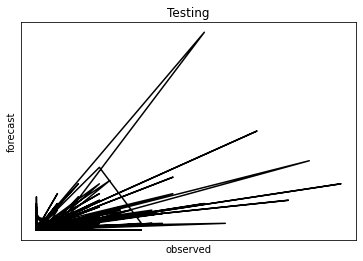

In [ ]:
# Plot outputs testing
plt.plot(X_test, y_test, color="black")

plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Testing')
plt.xticks(())
plt.yticks(())


plt.show()

Text(0.5, 1.0, 'Testing')

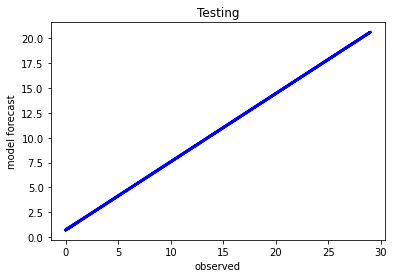

In [ ]:
plt.plot(X_test, y_test_predict, color="blue", linewidth=3)
plt.xlabel('observed')
plt.ylabel('model forecast')
plt.title('Testing')


Text(0.5, 1.0, 'Training')

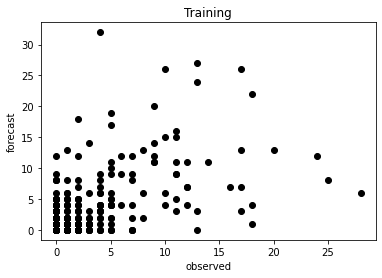

In [ ]:
#plot outputs of training data

plt.scatter(X_train, y_train, color="black")

plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Training')


Text(0.5, 1.0, 'Training')

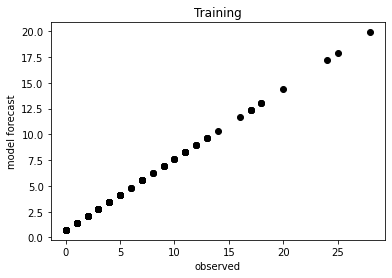

In [ ]:
plt.scatter(X_train, y_train_predict, color="black")

plt.xlabel('observed')
plt.ylabel('model forecast')
plt.title('Training')


Text(0.5, 1.0, 'forecast')

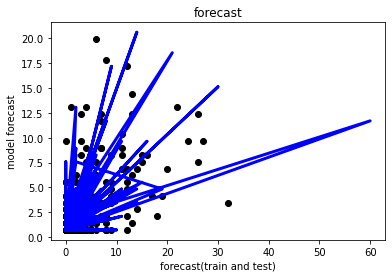

In [ ]:
# Training - testing plot of forecast(Y)
plt.scatter(y_train, y_train_predict, color="black")
plt.plot(y_test, y_test_predict, color="blue", linewidth=3)

plt.xlabel('forecast(train and test)')
plt.ylabel('model forecast')
plt.title('forecast')

Text(0.5, 1.0, 'observation')

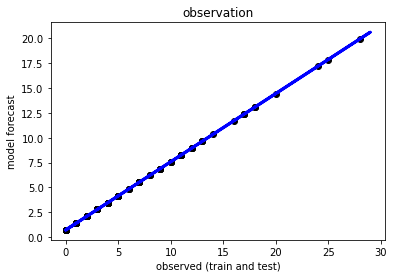

In [ ]:
#training- testing plot of observation(X)
plt.scatter(X_train, y_train_predict, color="black")
plt.plot(X_test, y_test_predict, color="blue", linewidth=3)

plt.xlabel('observed (train and test)')
plt.ylabel('model forecast')
plt.title('observation')


In [ ]:
predicted = LR.predict([[20.000]])    

In [ ]:
predicted

array([14.43450849])

SUPPORT VECTOR MACHINE CODE


In [ ]:
#SUPPORT VECTOR MACHINE
from sklearn import preprocessing
from sklearn import svm

svm_regr = svm.SVC(kernel='rbf')
svm_regr.fit(X_train, y_train) 

SVC()

In [ ]:
y_test_predict = svm_regr.predict(X_test)
y_train_predict = svm_regr.predict(X_train)

In [ ]:
from sklearn import metrics
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))


print("\n-----Training Accuracy-------")
print(round(svm_regr.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(svm_regr.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 1.7423076923076923
MSE: 23.896153846153847
RMSE: 4.88836924200227

-------Train Data--------
MAE: 1.4155629139072847
MSE: 12.193708609271523
RMSE: 3.491949113213353

-----Training Accuracy-------
66.4
-----Testing Accuracy--------
67.30000000000001


In [ ]:
print("-------observation vs ncmrwf forecast--------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test))
print('MSE:', metrics.mean_squared_error(X_test, y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test)))

print("-------observation vs model forecast --------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(X_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test_predict)))


-------observation vs ncmrwf forecast--------
MAE: 1.65
MSE: 17.796153846153846
RMSE: 4.218548784375244
-------observation vs model forecast --------
MAE: 1.1615384615384616
MSE: 8.96923076923077
RMSE: 2.9948674042819943


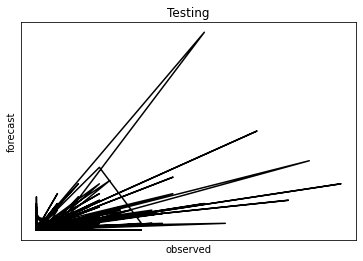

In [ ]:
# Plot outputs testing
plt.plot(X_test, y_test, color="black")

plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Testing')
plt.xticks(())
plt.yticks(())


plt.show()

Text(0.5, 1.0, 'Testing')

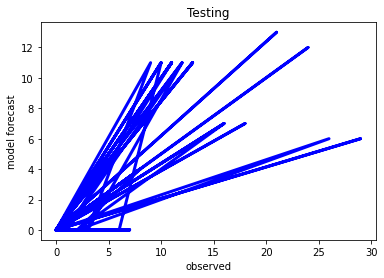

In [ ]:
plt.plot(X_test, y_test_predict, color="blue", linewidth=3)
plt.xlabel('observed')
plt.ylabel('model forecast')
plt.title('Testing')


RANDOM FOREST CLASSIFIER

In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [ ]:
y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)

In [ ]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 1.8176137564028338
MSE: 18.497546304983928
RMSE: 4.300877387810995

-------Train Data--------
MAE: 1.4841915946399844
MSE: 8.44960122315686
RMSE: 2.906819778238214


In [ ]:
print("-----------Training Accuracy------------")
print(round(random_forest_model.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(random_forest_model.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
48.4
-----------Testing Accuracy------------
33.300000000000004


In [ ]:
predicted = random_forest_model.predict([[20.000]])

In [ ]:
predicted

array([10.1495208])